In [33]:
import glob
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration

In [5]:
path_to_library = '/home/paula/Masterarbeit/KinaseFocusedFragmentLibrary/FragmentLibrary'

# list of folders for each subpocket
folders = glob.glob(path_to_library+'/*')
subpockets = [folder[-2:] for folder in folders]
subpockets

['FP', 'B2', 'AP', 'SE', 'B1', 'GA']

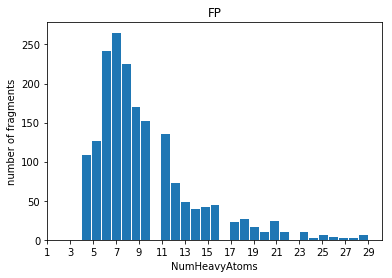

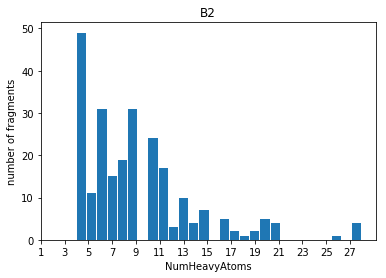

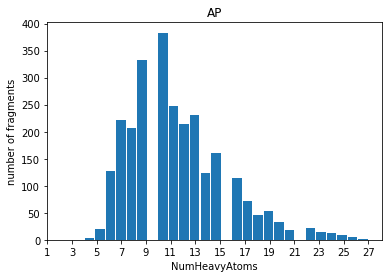

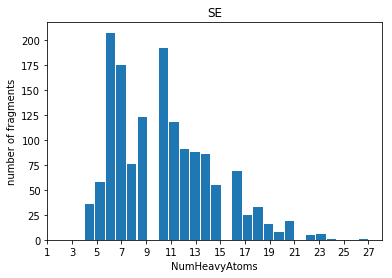

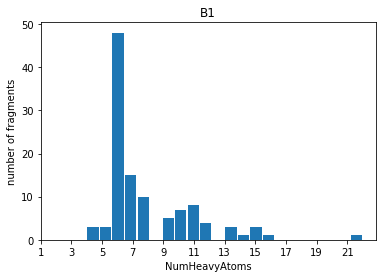

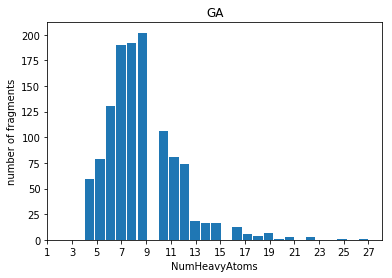

In [8]:
# draw histograms with size of fragments in each subpocket

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]
    file = folder+'/'+subpocket+'.sdf'
    
    df = PandasTools.LoadSDF(file, includeFingerprints=True, embedProps=True)
    # add numheavyatoms column
    df['NumHeavyAtoms'] = df.apply(lambda x: x['ROMol'].GetNumHeavyAtoms(), axis=1)
    
    # img = Draw.MolsToGridImage(list(allFragments),molsPerRow=10,subImgSize=(200,200))
    # img.save(folder+'/all_fragments.png')

    numAtoms = df.NumHeavyAtoms
    plt.hist(numAtoms, density=False, bins=max(numAtoms), rwidth=0.9)
    plt.title(subpockets[i])
    plt.xlabel('NumHeavyAtoms')
    plt.xticks(np.arange(1, max(numAtoms)+1, 2))
    plt.ylabel('number of fragments')
    plt.savefig(folder+'/NumHeavyAtoms.png')
    plt.show()
     

,ID,ROMol,complex_pdb,family,group,kinase,ligand_pdb,NumHeavyAtoms
20,3qkm_chainA,,3qkm,Akt,AGC,AKT1,SM9,26
23,6ccy_altA_chainA,,6ccy,Akt,AGC,AKT1,EX4,25
1522,5u7r_chainC,,5u7r,DMPK,AGC,ROCK2,81G,23
1891,2r7b_chainA,,2r7b,PDK1,AGC,PDK1,253,25
1936,5fbw_chainA,,5fbw,PIK,Atypical,PI4KB,5W8,25
2466,6g6w_altA_chainA,,6g6w,PIK,Atypical,p110d,EO5,23
2468,2chw_chainA,,2chw,PIK,Atypical,p110g,039,23
2470,2chz_chainA,,2chz,PIK,Atypical,p110g,093,24
2487,3ml9_chainA,,3ml9,PIK,Atypical,p110g,ML9,23
2528,4g11_chainA,,4g11,PIK,Atypical,p110g,0W7,23

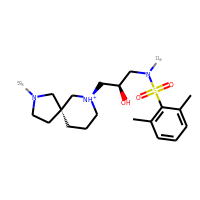
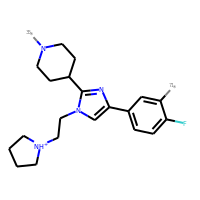
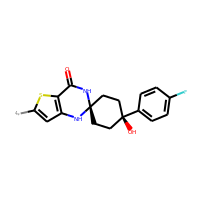
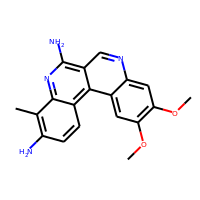
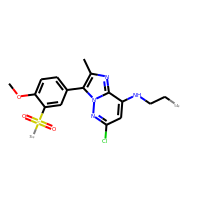
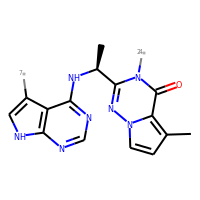
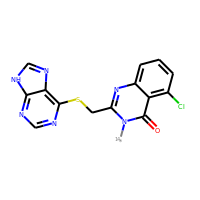
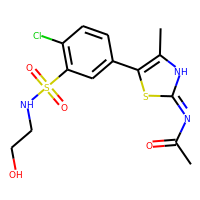
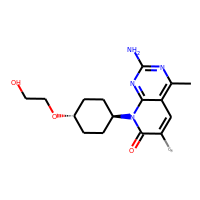
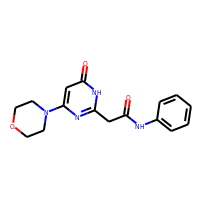
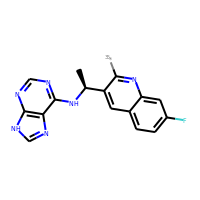
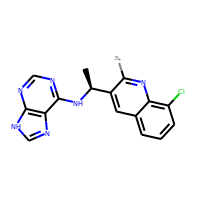
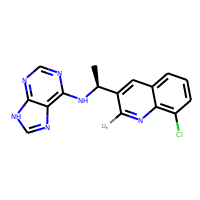
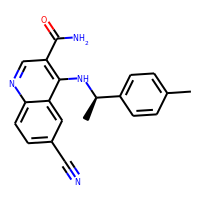
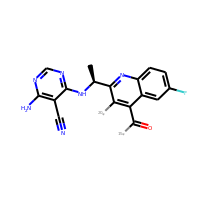
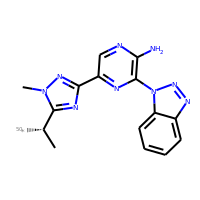
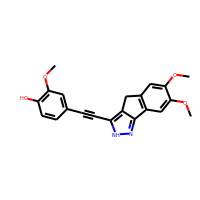
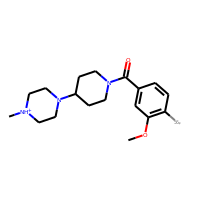
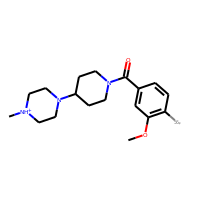
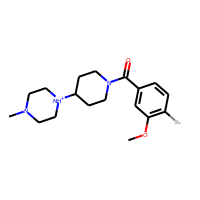
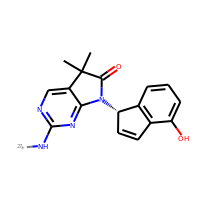
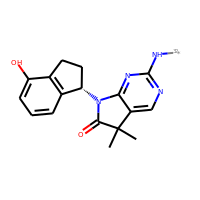
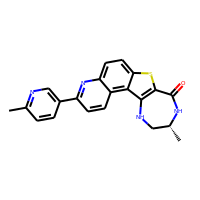
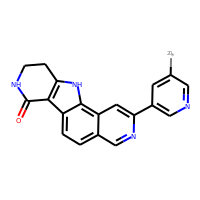
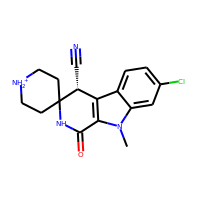
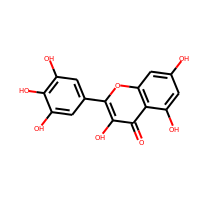
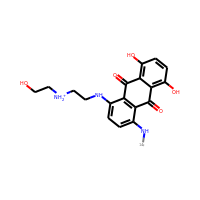
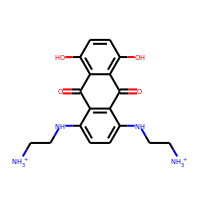
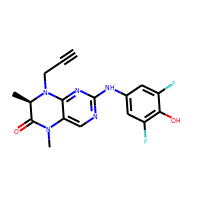
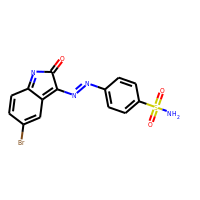
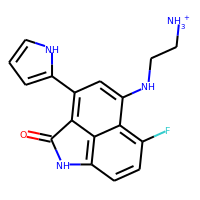
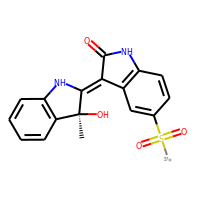
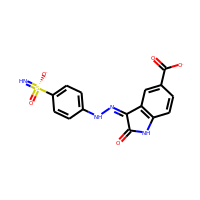
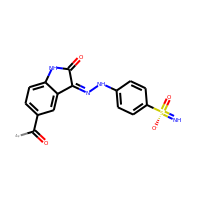
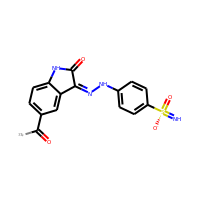
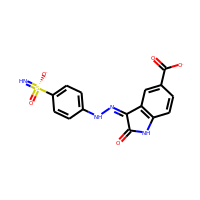
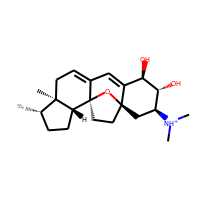
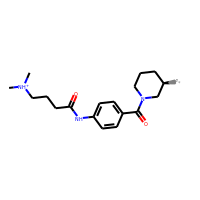
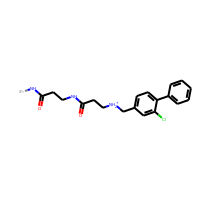
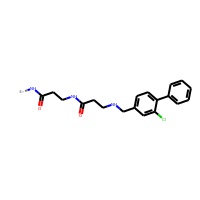
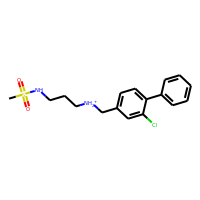
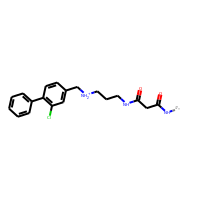
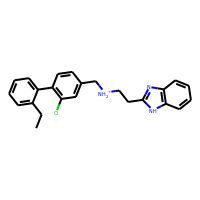
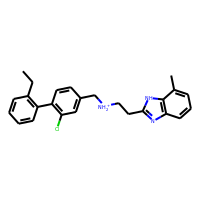
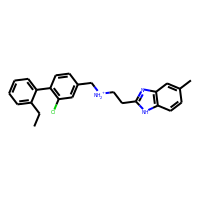
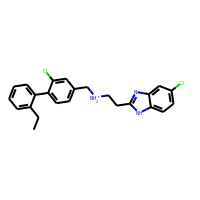
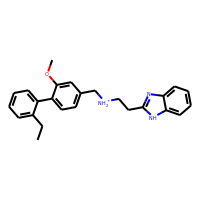
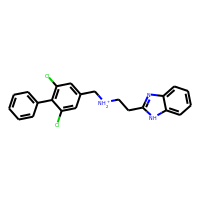
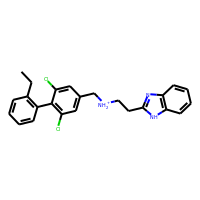
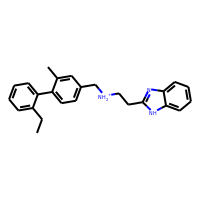
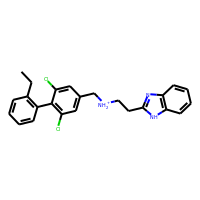
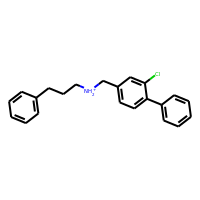
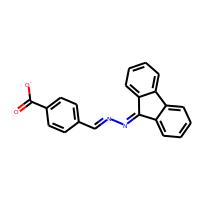
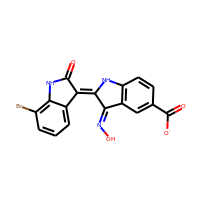
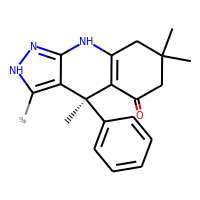
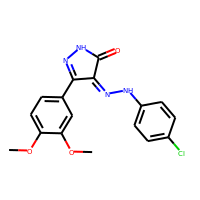
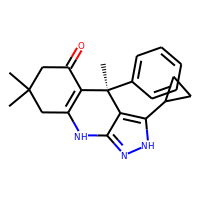
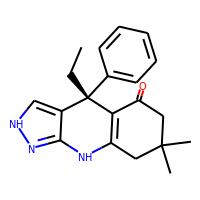
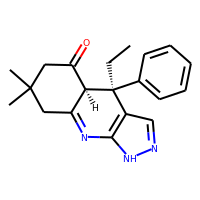
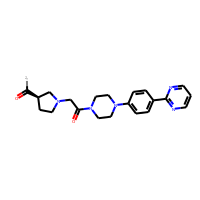
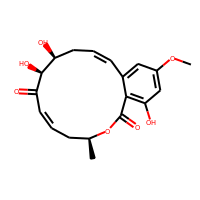
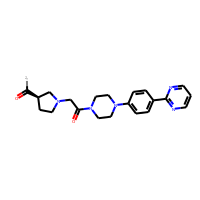
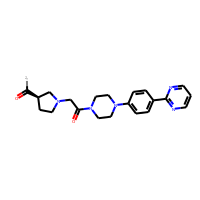
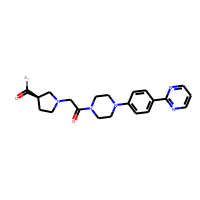
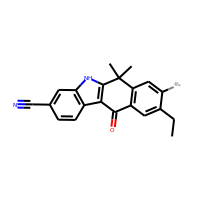
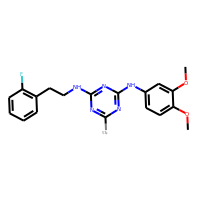
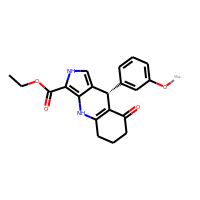
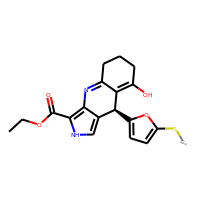
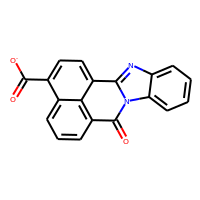
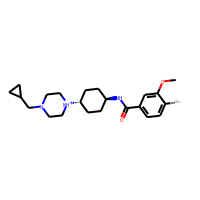
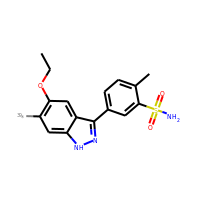
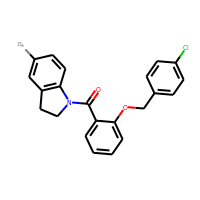
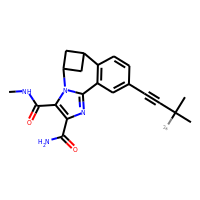
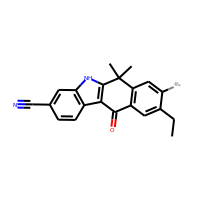
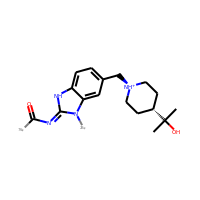
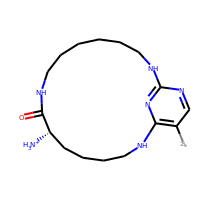
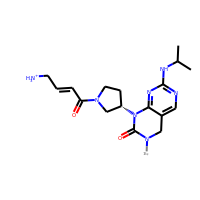
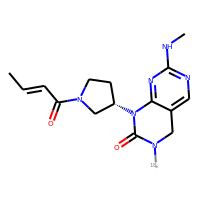
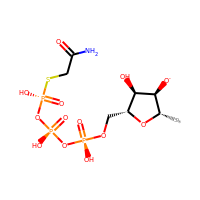
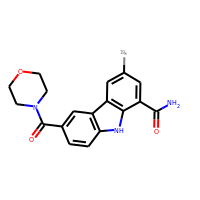
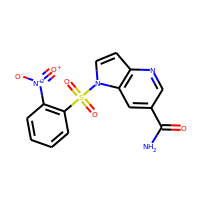
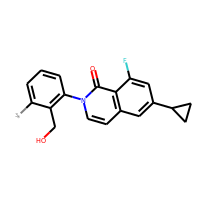
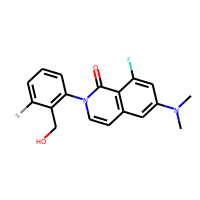
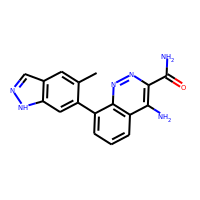
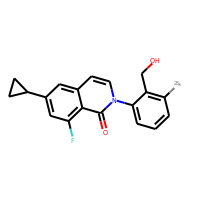
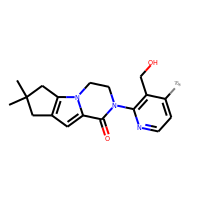
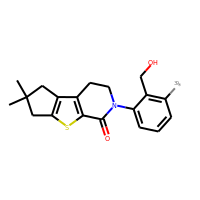
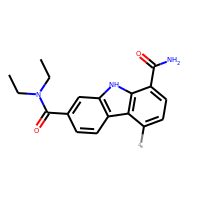
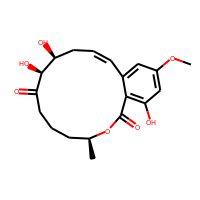

In [32]:
# large fragments

legend = []
draw_fragments = pd.DataFrame()
# iterate over subpockets
for i, folder in enumerate(folders):

    subpocket = subpockets[i]
    file = folder+'/'+subpocket+'.sdf'
    
    df = PandasTools.LoadSDF(file, includeFingerprints=True, embedProps=True)
    # add numheavyatoms column
    df['NumHeavyAtoms'] = df.apply(lambda x: x['ROMol'].GetNumHeavyAtoms(), axis=1)
 
    df_large_fragments = df[df.NumHeavyAtoms > 22]
    #legend.extend(df_large_fragments.ID+' '+df_large_fragments.kinase+' '+subpocket)
    
    for fragment in df_large_fragments.ROMol:
        tmp = AllChem.Compute2DCoords(fragment)
    
    draw_fragments = draw_fragments.append(df_large_fragments)
    
    #draw_fragments.extend(df_large_fragments.ROMol)

draw_fragments.sort_values(by=['group', 'family', 'kinase'])
#Draw.MolsToGridImage(draw_fragments, legends=legend, molsPerRow=1, subImgSize=(800,200), maxMols=100)